In [59]:

import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
from datetime import date
import seaborn as sns
from sklearn.linear_model import LinearRegression
import time


In [60]:
file="train-data.csv"
df=pd.DataFrame(pd.read_csv(file))
df.sort_values("Price",ascending=False)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4079,4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.0,2.3 Cr,160.00
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,NaN,120.00
5919,5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.5 kmpl,5000 CC,488.1 bhp,2.0,NaN,100.00
1505,1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65 kmpl,2993 CC,255 bhp,5.0,1.39 Cr,97.07
1974,1974,BMW 7 Series 740Li,Coimbatore,2018,28060,Petrol,Automatic,First,12.05 kmpl,2979 CC,320 bhp,5.0,NaN,93.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,2605,Tata Nano Cx,Jaipur,2010,57000,Petrol,Manual,First,26.0 kmpl,624 CC,35 bhp,4.0,NaN,0.50
2847,2847,Hyundai Getz GLS,Pune,2005,86000,Petrol,Manual,Second,15.3 kmpl,1341 CC,83 bhp,5.0,NaN,0.45
1628,1628,Maruti 800 Std BSIII,Jaipur,2004,12000,Petrol,Manual,Second,16.1 kmpl,796 CC,37 bhp,4.0,NaN,0.45
3138,3138,Maruti Zen LXI,Jaipur,1998,95150,Petrol,Manual,Third,17.3 kmpl,993 CC,60 bhp,5.0,NaN,0.45


Droping all columns with np.nan Values as Header (i.e, in our dataset its the first column)

In [61]:
df=df.drop("Unnamed: 0",axis=1)
print("🟢 Successfully Droped all columns with np.nan Header.")

🟢 Successfully Droped all columns with np.nan Header.


In [62]:
df.describe(include="all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


Insert a new column for Age of car.

In [63]:
df["Age"]= date.today().year-df["Year"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
 13  Age                6019 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [64]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Age                     0
dtype: int64

In [65]:
df=df.fillna(0)
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Age                  0
dtype: int64

Droping rows that have Null values in Price column. ( Because Price is our Target)

In [66]:
df["Price"].dropna(inplace=True,axis=0) # droped rows missing prices
print("🟢 Successfully Droped all rows where Price is 'NaN'")

🟢 Successfully Droped all rows where Price is 'NaN'


Creating a function for Spliting and Converting the data from "object" to "float64"

In [67]:
#Spliting and Converting the data from "object" to "float64"
def unitsplit(col_name):
    
    df[col_name]=df[col_name].fillna(0)
    ind=0
    
    for i in df[col_name]:
        if len(str(i))==0:
            df[col_name][ind]=0
        elif i=='null':
            df[col_name][ind]=0
        
        df[col_name][ind]=float((str(i).split(" "))[0].strip())
        ind+=1
    
    df[col_name]=pd.to_numeric(df[col_name],errors="ignore")
    print("🟢 Dtype of ",col_name," Column has successfully converted to",df[col_name].dtype)
    return df[col_name].dtype

In [68]:
unitsplit("Mileage")
unitsplit("Engine")

C:\Users\MAYANK\AppData\Local\Temp\ipykernel_1164\349185586.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][ind]=float((str(i).split(" "))[0].strip())


🟢 Dtype of  Mileage  Column has successfully converted to float64
🟢 Dtype of  Engine  Column has successfully converted to float64


dtype('float64')

Information of whole  Data as : 

In [69]:
round(df.describe(),2) #Information 

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price,Age
count,6019.00,6019.00,6019.00,6019.00,6019.00,6019.00,6019.00
mean,2013.36,58738.38,18.13,1611.58,5.24,9.48,9.64
std,3.27,91268.84,4.59,612.45,0.92,11.19,3.27
min,1998.00,171.00,0.00,0.00,0.00,0.44,4.00
25%,2011.00,34000.00,15.16,1197.00,5.00,3.50,7.00
50%,2014.00,53000.00,18.15,1493.00,5.00,5.64,9.00
75%,2016.00,73000.00,21.10,1969.00,5.00,9.95,12.00
max,2019.00,6500000.00,33.54,5998.00,10.00,160.00,25.00


What are the average prices and avg kms driven of different seat types?

In [70]:
#What are the average prices and Kms driven of different seat types?
gbSeat=round(df[df["Seats"]!=0][["Seats","Price","Kilometers_Driven","Year","Age"]].groupby("Seats").mean(),2)
gbSeat=gbSeat.sort_values(by="Price")
gbSeat["Year"]=round(gbSeat["Year"])
gbSeat

,Price,Kilometers_Driven,Year,Age
Seats,,,,
10.0,4.28,99301.40,2008.0,15.40
9.0,4.45,97081.33,2012.0,11.33
8.0,7.46,93803.34,2012.0,11.43
5.0,8.48,56428.16,2013.0,9.64
6.0,9.51,54053.35,2014.0,9.48
7.0,14.84,71852.83,2014.0,8.86
4.0,20.75,39004.09,2013.0,10.36
2.0,55.21,18372.25,2014.0,9.44


array([[<AxesSubplot: title={'center': 'Price'}>,
        <AxesSubplot: title={'center': 'Kilometers_Driven'}>],
       [<AxesSubplot: title={'center': 'Year'}>,
        <AxesSubplot: title={'center': 'Age'}>]], dtype=object)

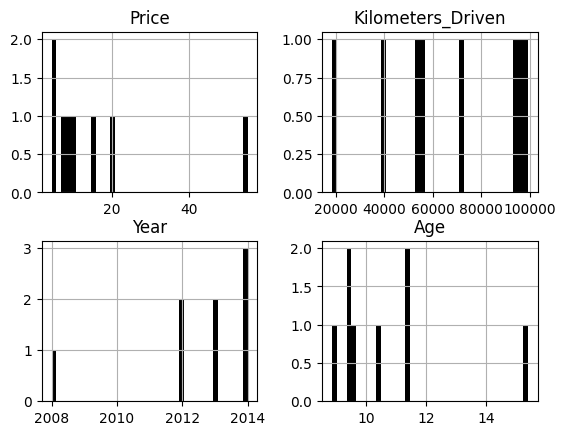

In [71]:
gbSeat.hist(bins=40,color='k')

What is correlation of dataset? 
Which variables are maximum Correlated? 
Consdering Heatmap

In [72]:
df.corr()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price,Age
Year,1.000000,-0.173048,0.320643,-0.030592,0.060698,0.305327,-1.000000
Kilometers_Driven,-0.173048,1.000000,-0.064915,0.087549,0.068683,-0.011493,0.173048
Mileage,0.320643,-0.064915,1.000000,-0.549938,-0.209828,-0.306191,-0.320643
Engine,-0.030592,0.087549,-0.549938,1.000000,0.429216,0.647232,0.030592
Seats,0.060698,0.068683,-0.209828,0.429216,1.000000,0.057656,-0.060698
Price,0.305327,-0.011493,-0.306191,0.647232,0.057656,1.000000,-0.305327
Age,-1.000000,0.173048,-0.320643,0.030592,-0.060698,-0.305327,1.000000


<AxesSubplot: >

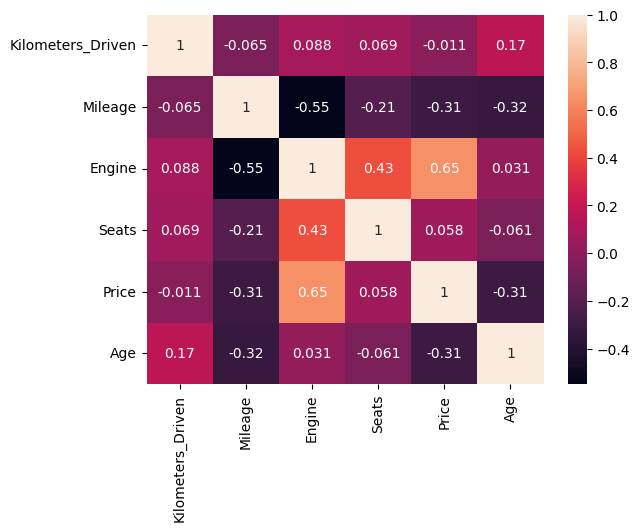

In [73]:
sns.heatmap(df[["Kilometers_Driven","Mileage","Engine","Seats","Price","Age"]].corr(),annot=True)

<AxesSubplot: xlabel='Seats', ylabel='Price'>

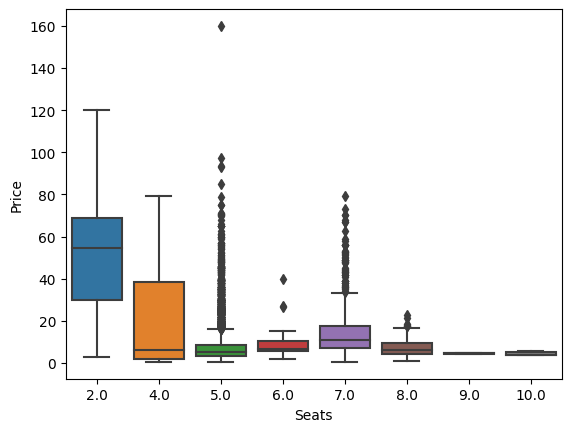

In [74]:
sns.boxplot(data=df, x=df[df["Seats"]>0]["Seats"], y=df["Price"])

Create Catogorical Search : LowRange / MidRange / Premium

Extraction of all different company names from Dataset.

In [75]:
def Cars(tempdf):
    company=[]
    for i in tempdf["Name"]:
        fullname=""
        if (i.split(" ")[0]) == "Mini":
            for n in i.split(" ")[0:2]:
                fullname+=n+" "
            company.append(fullname.strip())
        else:
            company.append(i.split(" ")[0].strip())
    company.sort()
    companydf=pd.DataFrame(company)
    return set(company)
Cars(df)

{'Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini Clubman',
 'Mini Cooper',
 'Mini Countryman',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo'}

In [76]:
def CarsForYou(fromdata,price):
    FivePercentData=pd.merge(fromdata[fromdata["Price"]<=(price+(0.05*price))],fromdata[fromdata["Price"]<=(price-(0.05*price))],how="inner")
    carsforyou=Cars(FivePercentData)
    return carsforyou
CarsForYou(df,5)

{'Ambassador',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Ford',
 'Honda',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen'}

In [77]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Price,Age
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.128935,1611.579498,5.241901,9.479468,9.641801
std,3.269742,9.126884e+04,4.593436,612.449869,0.918025,11.187917,3.269742
min,1998.000000,1.710000e+02,0.000000,0.000000,0.000000,0.440000,4.000000
25%,2011.000000,3.400000e+04,15.160000,1197.000000,5.000000,3.500000,7.000000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,5.000000,5.640000,9.000000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,5.000000,9.950000,12.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,10.000000,160.000000,25.000000


Creation of 4 ranges of Cars bases on its price quartiles.

In [78]:
#Ranges of Cars as per prices 
x=df["Price"].describe()
LowerRangePrice=x["25%"]
MidRangePrice=x["50%"]
HigherRangePrice=x["75%"]
PremiumRangePrice=x["max"]
x

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [79]:
# df[df["Price"]<=lowerRange]
pd.merge(df[(df["Price"]>=x["min"])],df[df["Price"]<=LowerRangePrice], how="inner").sort_values("Price")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Age
472,Tata Nano Lx,Pune,2011,65000,Petrol,Manual,Second,26.00,624.0,35 bhp,4.0,0,0.44,12
453,Maruti 800 Std BSIII,Jaipur,2004,12000,Petrol,Manual,Second,16.10,796.0,37 bhp,4.0,0,0.45,19
753,Hyundai Getz GLS,Pune,2005,86000,Petrol,Manual,Second,15.30,1341.0,83 bhp,5.0,0,0.45,18
835,Maruti Zen LXI,Jaipur,1998,95150,Petrol,Manual,Third,17.30,993.0,60 bhp,5.0,0,0.45,25
853,Maruti 800 Std,Pune,2003,52000,Petrol,Manual,First,16.10,796.0,37 bhp,4.0,0,0.50,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Honda Accord VTi-L AT,Delhi,2009,65462,Petrol,Automatic,Third,11.10,2354.0,142 bhp,5.0,0,3.50,14
113,Maruti Swift LDI,Delhi,2013,70000,Diesel,Manual,First,22.90,1248.0,74 bhp,5.0,0,3.50,10
107,Tata Indica Vista Aqua 1.3 Quadrajet,Hyderabad,2014,133944,Diesel,Manual,Second,18.00,1248.0,75 bhp,5.0,0,3.50,9
1108,Honda City V MT AVN,Pune,2012,89000,Petrol,Manual,Second,16.80,1497.0,116.3 bhp,5.0,0,3.50,11


Different used dataframes( useddf ) based on user decided range of cars.

In [80]:
def CarRange(carrange):
    # carrange=(input("Price Range: "))
    cars=[]
    if carrange=="Lower Range":
        useddf=pd.merge(df[df["Price"]>=x["min"]],df[df["Price"]<=LowerRangePrice],how="inner").sort_values("Price")
        cars=list(Cars(useddf))
    elif carrange=="Mid Range":
        useddf=pd.merge(df[df["Price"]>=LowerRangePrice],df[df["Price"]<=MidRangePrice],how="inner").sort_values("Price")
        cars=list(Cars(useddf))
    elif carrange=="Higher Range":
        useddf=pd.merge(df[df["Price"]>=MidRangePrice],df[df["Price"]<=HigherRangePrice],how="inner").sort_values("Price")
        cars=list(Cars(useddf))
    elif carrange=="Premium Range":
        useddf=pd.merge(df[df["Price"]>=HigherRangePrice],df[df["Price"]<=PremiumRangePrice],how="inner").sort_values("Price")
        cars=list(Cars(useddf))
    else:
        useddf=df
    return useddf

I will use user's input as to select the Catagorical Range of Cars and then I will try to predict car price based on provided data.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


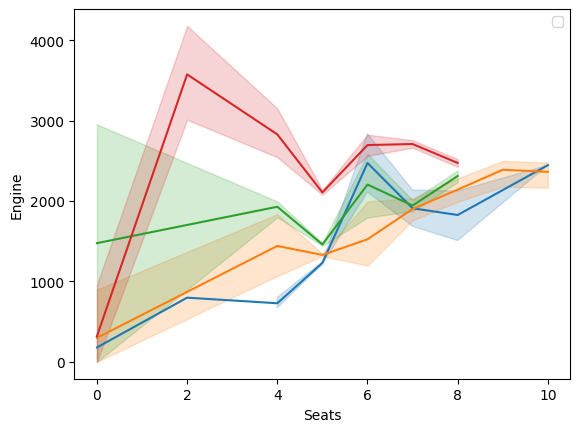

In [107]:
Low=sns.lineplot(data=CarRange("Lower Range"),y="Engine",x="Seats")
Mid=sns.lineplot(data=CarRange("Mid Range"),y="Engine",x="Seats")
High=sns.lineplot(data=CarRange("Higher Range"),y="Engine",x="Seats")
Prem=sns.lineplot(data=CarRange("Premium Range"),y="Engine",x="Seats")
plt.legend()

According to Heatmap and correlation data it is clear that "Price" is most closely correlated with the "Engine".
Now lets plot some visualizations for "Price" and "Engine".

In [22]:
def MyCarData(carName):
    return df[df["Name"].str.contains(carName)]

I have Used Tkinter library to Create GUI for IO of code.

In [25]:
from tkinter import *
import tkinter.messagebox as tmsg
root=Tk()
root.title("Old Car Price Prediction Model")
root.geometry('750x600')
# root.title("Used Car Price Predition Model")

Headline=Label(root,text="Enter Your Choices Here", width=500,font=('bold',10))
Headline.place(x=100,y=30)

def CarRangetk():
      # Converting Tkinter data entry to variables #####################
      SelectedRange=RangeButton.get()
      SelectedEngineSize=EngineSlider.get()
      SelectedAge=AgeSlider.get()
      SelectedMileage=MileageSlider.get()
      SelectedSeat=SeatSlider.get()
      # Converted Tkinter data entry to variables ----------------------
      print(SelectedEngineSize,SelectedAge,SelectedMileage,SelectedRange)

    #Tkinter calculation ################
    
def PredFunc():
    preprice=0
    
    # Calculation Starts Here ----------------
    newdf=data[["Engine","Age","Mileage","Seats"]]
    reg = LinearRegression().fit(newdf,data.Price )
    preprice=round(float(reg.predict(np.array([[int(EngineSlider.get()),int(AgeSlider.get()),int(MileageSlider.get()),int(SeatSlider.get())]]))),2)# Actually prediction is being calculated by this function of LinearRegression
    
    if preprice<=0:
        tmsg.showinfo(" Car with Such Feature doesnot exist.",f"I can Pay Rs.{abs(preprice)} Lakhs if you got balls to find one such for me.")
    else:
        tmsg.showinfo("Car Price can be nearly ",f"Rs.{float(preprice)} Lakhs")
        print( float(preprice)," Lakhs")
    # Calculation Ends Here ----------------
    
    # Showing Car Company that can provide mentioned features in this price ########
    Output_Cars=len(data[data["Price"]<=float(preprice)])
    carNames=(list(CarsForYou(data,float(preprice))))
    textbox=Text(root)
    
    for item in carNames:
        textbox.insert(END,item.upper() +"\n")
        print(item)
    textbox.pack(pady=30)
    # .......................................
    #-------------------------------------------------------------------------------


# Engine size selection Part Starts #############
Label(root,text= "Car Engine Size in CC ",justify="left").pack()
EngineSlider=Scale(root,from_=df.Engine.min(), to=df.Engine.max(),orient=HORIZONTAL,length=750)
EngineSlider.set(df.Engine.median())
EngineSlider.pack()
# Engine size selection Part Ends--------------

# Car Age selection Part Starts #############
Label(root,text= "Car Age in Years ",justify="left").pack()
AgeSlider=Scale(root,from_=0, to=100,orient=HORIZONTAL,length=750)
AgeSlider.set((df.Age.median()))
AgeSlider.pack()
# Car Age selection Part Ends  --------------


# Mileage selection Part Starts #############
Label(root,text= "Car Mileage in Kmpl or km/kg ",justify="left").pack()
MileageSlider=Scale(root,from_=df.Mileage.min(), to=df.Mileage.max(),orient=HORIZONTAL,length=750)
MileageSlider.set((df.Mileage.median()))
MileageSlider.pack()
# Mileage selection Part Ends ---------------

# Seats selection Part Starts #############
Label(root,text= "Car Seats ",justify="left").pack()
SeatSlider=Scale(root,from_=2, to=df.Seats.max(),orient=HORIZONTAL,length=750)
SeatSlider.set((df.Seats.median()))
SeatSlider.pack()
# Seats selection Part Ends ---------------

# car Range Selection Part Starts ##############    
RangeButton=StringVar()
RangeButton.set("All Range")

Label(root,text="Select Car Range of your choice:",width=100,font=("bold",10),
      justify="center",padx=10,pady=5).pack()
data=CarRange(RangeButton.get())
Rangeradio=Radiobutton(root,text="Lower Range", padx=10,variable=RangeButton, value="Lower Range").pack(anchor="w")
Rangeradio=Radiobutton(root,text="Mid Range", padx=10,variable=RangeButton, value="Mid Range").pack(anchor="w")
Rangeradio=Radiobutton(root,text="Higher Range", padx=10,variable=RangeButton, value="Higher Range").pack(anchor="w")
Rangeradio=Radiobutton(root,text="Premium Range", padx=10,variable=RangeButton, value="Premium Range").pack(anchor="w")
# Car Range selection part Ends----------------

def CarCompany(RangeButton):
# Car Company Part Starts ##############    
    CarCompanies=StringVar()
    CarCompanies.set("All Range")

    Label(root,text="Select Car Company choice:",width=100,font=("bold",10),
        justify="Right",padx=30,pady=5).pack()
    
    for name in Cars(data):
        Rangeradio2 =Radiobutton(root,text="Audi", padx=10,variable=CarCompanies, value=name).pack(anchor="w")
    
# Car Company selection part Ends----------------


# Outpuot of Cars ##########

# Button(text="Car Company",command=CarCompany,padx=100,pady=3).pack()
Button(text="Predict Car Price",command=PredFunc,padx=500,pady=3).pack()
root.mainloop()




c:\Users\MAYANK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9.6  Lakhs
Renault
Mahindra
Nissan
Maruti
Tata
Datsun
Volkswagen
Mercedes-Benz
Audi
BMW
ISUZU
Smart
Ambassador
Honda
Hyundai
Toyota
Ford
Porsche
Volvo
Fiat
Mitsubishi
Force
Skoda
Chevrolet


c:\Users\MAYANK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9.6  Lakhs
Renault
Mahindra
Nissan
Maruti
Tata
Datsun
Volkswagen
Mercedes-Benz
Audi
BMW
ISUZU
Smart
Ambassador
Honda
Hyundai
Toyota
Ford
Porsche
Volvo
Fiat
Mitsubishi
Force
Skoda
Chevrolet


FOR TERMINAL INPUT/OUTPUT

In [24]:
UserCarRange=input("Car Range :")
data=CarRange(UserCarRange)
newdf=data[["Engine","Age","Mileage","Seats"]]
reg = LinearRegression().fit(newdf,data.Price )

# Car company Names
allCars=Cars(data)

EngineS=float(input("Engine: "))
Age=float(input("Year Old Car: "))
Mileage=float(input("Mileage: "))
Seats=float(input("Seats: "))

preprice=reg.predict(np.array([[EngineS,Age,Mileage,Seats]])) # Actually prediction is being calculated by this function of LinearRegression
print("Selected Car Range",UserCarRange," CC")
print("Engine Size ",EngineS," CC")
print("Year Old Car ",Age," Years")
print("Mileage ",Mileage," kmpl or km/kg")
print("Seats ",Seats," Seats")

#Displaying Number of Cars we have under this price range
selectedCars=len(data[data["Price"]<=float(preprice)])
print("We Have ", (selectedCars), " Cars in ",UserCarRange,".")
print(Cars(data))

print("These Cars are near your predicted price: \n",CarsForYou(data,float(preprice)))

if float(preprice)<x["min"]:
    print("\nThis type of car is sold as GARABGE.")
else:
    print("\nExpected price of your choice car may be : ",float(preprice),"Lakhs")

ValueError: could not convert string to float: ''